In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fc7ed80c-198a-46bc-8434-a4a224f86332',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-07-25T19:15:56.347Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 10028}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11615, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')


In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'fc7ed80c-198a-46bc-8434-a4a224f86332',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    pd.set_option('display.float_format', lambda x: '%5f' % x)
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])

    if not os.path.isfile(r'C:\Users\sarve\OneDrive\Desktop\crypto API Project\API.csv'):
        df.to_csv(r'C:\Users\sarve\OneDrive\Desktop\crypto API Project\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\sarve\OneDrive\Desktop\crypto API Project\API.csv', mode='a', header=False)

In [5]:

from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API runner complete')
    sleep(60)

API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete
API runner complete


In [6]:
df.tail()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
10,1958,TRON,TRX,tron,1002,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,87065703529.406479,87065694699.721588,True,NaN,11,71659659264.000000,9744920067.401293,None,2024-07-26T00:50:00.000Z,0.135989,309070786.227196,27.697300,0.476509,0.994270,1.379959,11.511431,20.448358,13.577864,11839971473.774000,0.502400,11839970273.030001,None,2024-07-26T00:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-26 06:22:36.225848
11,5805,Avalanche,AVAX,avalanche,755,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.000000,394807697.533842,444154067.533842,False,NaN,12,NaN,NaN,None,2024-07-26T00:50:00.000Z,27.382319,399680814.981898,-10.188900,0.554040,-3.997956,1.169503,7.991491,-25.841691,-19.748068,10810750177.696175,0.458800,19598859494.000000,None,2024-07-26T00:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-26 06:22:36.225848
12,5994,Shiba Inu,SHIB,shiba-inu,848,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589270546809170.250000,589519106584391.250000,False,NaN,13,NaN,NaN,None,2024-07-26T00:50:00.000Z,0.000017,325984976.782991,43.692600,0.744436,-1.934758,-3.493783,-6.642901,-32.459763,-33.504393,9738161965.577805,0.413300,9742269612.500000,None,2024-07-26T00:50:00.000Z,1027.000000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-07-26 06:22:36.225848
13,6636,Polkadot,DOT,polkadot-new,794,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1437953431.368154,1437953431.368154,True,NaN,14,1473115032.500510,8495323513.758413,None,2024-07-26T00:50:00.000Z,5.766911,167493915.017193,26.704000,0.362456,-0.095954,-4.978540,-1.074495,-23.510037,-13.959762,8292549683.955007,0.351900,8292549683.960000,None,2024-07-26T00:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-26 06:22:36.225848
14,1975,Chainlink,LINK,chainlink,1820,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",NaN,608099970.452787,1000000000.000000,False,NaN,15,NaN,NaN,None,2024-07-26T00:50:00.000Z,13.050968,303731488.478744,30.505800,0.976319,-2.821933,-3.595468,-7.633071,-23.588264,-9.033342,7936293333.969775,0.336800,13050968129.570000,None,2024-07-26T00:50:00.000Z,1027.000000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-07-26 06:22:36.225848


In [7]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.332478,-0.237634,2.626909,5.768598,-4.593813,2.552005
Ethereum,0.277400,-5.708334,-7.633329,-7.265423,-17.915787,0.673346
Tether USDt,-0.000272,-0.011294,-0.004924,0.000293,0.030583,0.009238
BNB,0.173755,-1.225087,-0.063679,-1.356344,-5.050529,-5.085563
Solana,0.436795,-4.326494,7.847293,23.999728,4.693847,20.788065
USDC,-0.000580,0.007336,0.003219,-0.002372,0.002552,-0.004146
XRP,-0.166863,-3.367064,5.433780,25.469375,13.038135,13.636055
Dogecoin,0.496393,-3.786443,4.454824,-1.982145,-25.656195,-16.459821
Toncoin,0.256550,-4.650612,-9.408326,-12.351745,3.956913,22.345239


In [8]:
df3 = df2.stack()

name                                   
Bitcoin    quote.USD.percent_change_1h      0.332478
           quote.USD.percent_change_24h    -0.237634
           quote.USD.percent_change_7d      2.626909
           quote.USD.percent_change_30d     5.768598
           quote.USD.percent_change_60d    -4.593813
                                             ...    
Chainlink  quote.USD.percent_change_24h    -4.830776
           quote.USD.percent_change_7d     -5.696018
           quote.USD.percent_change_30d    -9.679812
           quote.USD.percent_change_60d   -24.949097
           quote.USD.percent_change_90d   -12.186116
Length: 90, dtype: float64

In [9]:
df4 = df3.to_frame(name='values')
df4.head()

values
name                                             
Bitcoin   quote.USD.percent_change_1h    0.332478
          quote.USD.percent_change_24h  -0.237634
          quote.USD.percent_change_7d    2.626909
          quote.USD.percent_change_30d   5.768598
          quote.USD.percent_change_60d  -4.593813
...                                           ...
Chainlink quote.USD.percent_change_24h  -4.830776
          quote.USD.percent_change_7d   -5.696018
          quote.USD.percent_change_30d  -9.679812
          quote.USD.percent_change_60d -24.949097
          quote.USD.percent_change_90d -12.186116

[90 rows x 1 columns]

In [10]:
df4.count()

values    90
dtype: int64

In [11]:
index = pd.Index(range(90))
# Note :- This line used before the line before to get index in dataframe
df5 = df4.set_index(index)
df5 = df4.reset_index()


In [12]:
df5 = df5.rename(columns={'level_1': 'percent_change'})

In [13]:
df5.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.332478
1,Bitcoin,quote.USD.percent_change_24h,-0.237634
2,Bitcoin,quote.USD.percent_change_7d,2.626909
3,Bitcoin,quote.USD.percent_change_30d,5.768598
4,Bitcoin,quote.USD.percent_change_60d,-4.593813
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,-4.830776
86,Chainlink,quote.USD.percent_change_7d,-5.696018
87,Chainlink,quote.USD.percent_change_30d,-9.679812
88,Chainlink,quote.USD.percent_change_60d,-24.949097


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

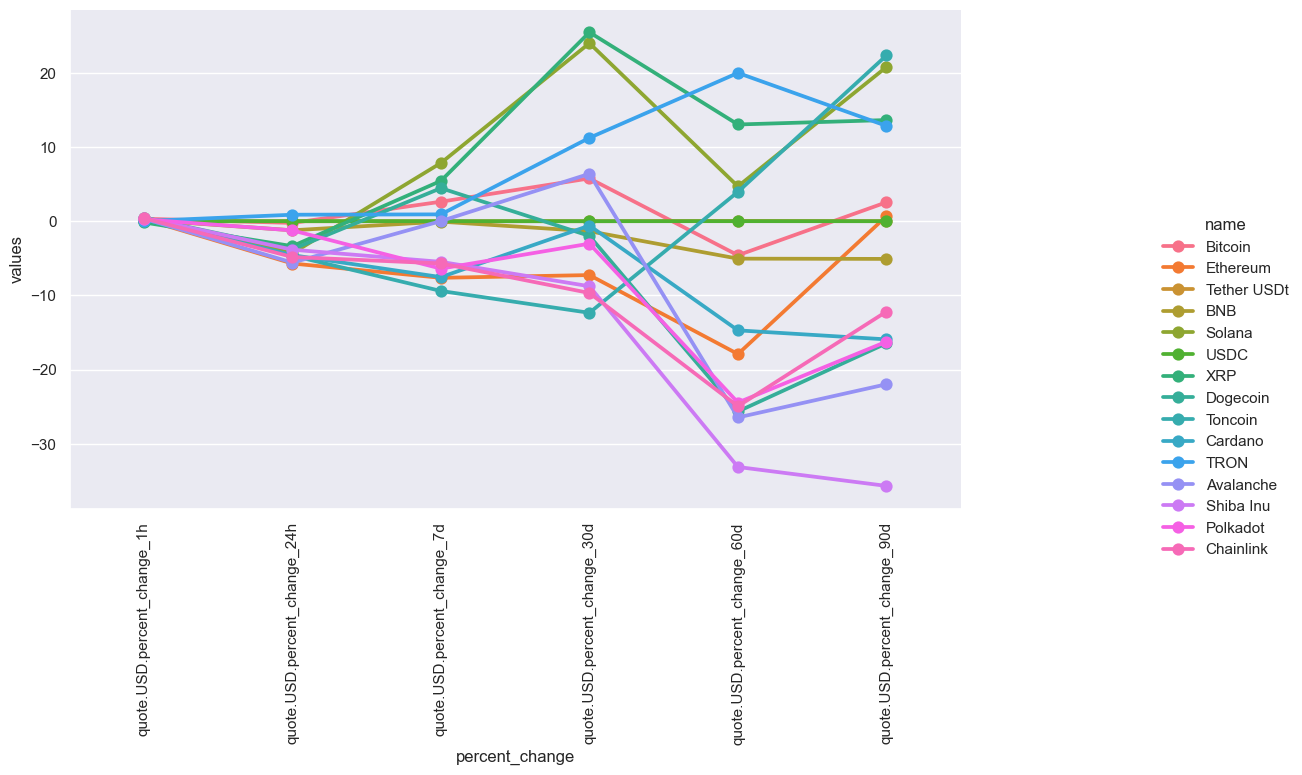

In [22]:
ax = sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')
ax.set_xticklabels(rotation=90)
ax.fig.set_size_inches(15, 6)
plt.show()

In [16]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10.head()

,name,quote.USD.price,timestamp
0,Bitcoin,64673.526144,2024-07-26 00:46:01.724529
0,Bitcoin,64673.526144,2024-07-26 00:46:02.066626
0,Bitcoin,64724.281331,2024-07-26 00:47:02.868154
0,Bitcoin,64710.445840,2024-07-26 00:48:03.213384
0,Bitcoin,64738.673648,2024-07-26 00:49:03.559963
...,...,...,...
0,Bitcoin,66195.124572,2024-07-26 06:18:32.549587
0,Bitcoin,66208.002846,2024-07-26 06:19:33.569142
0,Bitcoin,66236.317693,2024-07-26 06:20:34.602392
0,Bitcoin,66226.502519,2024-07-26 06:21:35.206207


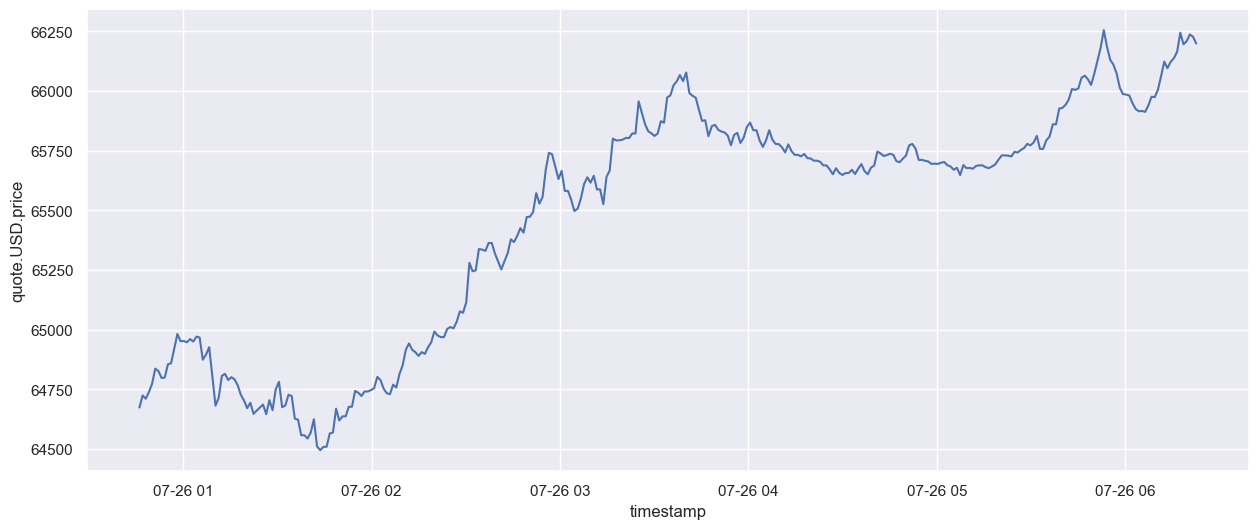

In [25]:
plt.figure(figsize=(15, 6))
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
plt.show()